# Simple linear regression from scratch

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
file = pd.read_csv('avocado.csv')[:800]
file

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.00,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.00,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.00,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.00,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.00,conventional,2015,Albany
5,5,2015-11-22,1.26,55979.78,1184.27,48067.99,43.61,6683.91,6556.47,127.44,0.00,conventional,2015,Albany
6,6,2015-11-15,0.99,83453.76,1368.92,73672.72,93.26,8318.86,8196.81,122.05,0.00,conventional,2015,Albany
7,7,2015-11-08,0.98,109428.33,703.75,101815.36,80.00,6829.22,6266.85,562.37,0.00,conventional,2015,Albany
8,8,2015-11-01,1.02,99811.42,1022.15,87315.57,85.34,11388.36,11104.53,283.83,0.00,conventional,2015,Albany
9,9,2015-10-25,1.07,74338.76,842.40,64757.44,113.00,8625.92,8061.47,564.45,0.00,conventional,2015,Albany


In [3]:
data = pd.DataFrame({'bags':file['Total Bags']/10000, 'volume':file['Total Volume']/1000000})
data

,bags,volume
0,0.869687,0.064237
1,0.950556,0.054877
2,0.814535,0.118220
3,0.581116,0.078992
4,0.618395,0.051040
5,0.668391,0.055980
6,0.831886,0.083454
7,0.682922,0.109428
8,1.138836,0.099811
9,0.862592,0.074339


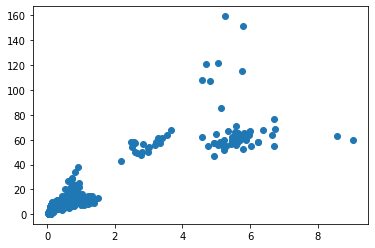

In [4]:
plt.plot(data['volume'], data['bags'], 'o')

In [5]:
def error(points, m, b):
    xs = points['volume']
    ys = points['bags']
    error = 0
    for i, x in enumerate(xs):
        error += (ys[i] - (m*x+b)) ** 2
    return error/len(ys)

In [6]:
def gradient(points, m, b, lr):
    xs = points['volume']
    ys = points['bags']
    g_m = 0
    g_b = 0

    for i, x in enumerate(xs):
        g_m += (x * (ys[i] - (m*xs[i]+b)))
        g_b += (ys[i] - (m*xs[i]+b))

    
    g_m = -2*g_m/len(xs)
    g_b = -2*g_b/len(xs)


    m -= g_m*lr
    b -= g_b*lr
    
    return m, b

In [7]:
def runner(m, b, data, itr):
    for _ in range(itr):
        m, b = gradient(data, m, b, 0.01)
        print(error(data, m, b))
    return m, b

In [8]:
m, b = 0, 0
m, b = runner(m, b, data, 1000)

459.7007450596014
415.26877911388414
375.91806142428015
341.06705520991784
310.200790874509
282.8632459060542
258.6505970751991
237.2052450770582
218.21052319210222
201.38601166397916
186.48338845567224
173.28275498283813
161.58938245198866
151.23083065537477
142.0543965861327
133.92485511799757
126.72245831592161
120.3411637712116
114.68706574394648
109.67700589662788
105.23734306062416
101.30286383039443
97.81581786444426
94.72506361742387
91.9853118619418
89.55645580578552
87.40297789169026
85.49342450155675
83.799940791883
82.29785877700168
80.96533256468342
79.78301534643462
78.73377336270845
77.80243261040413
76.97555454455524
76.24123745516553
75.58894058009125
75.00932835131985
74.49413246992808
74.03602976883153
73.62853405606512
73.26590033821729
72.9430400068394
72.6554457328847
72.39912495788403
72.1705409977818
71.96656088800603
71.78440919809903
71.62162713257263
71.47603631287599
71.3457067046285
71.2289282156194
71.12418554438027
71.03013590724801
70.94558931442495
70.8

69.88260242721223
69.88260215271615
69.88260188543174
69.88260162516927
69.8826013717446
69.88260112497777
69.88260088469404
69.88260065072305
69.88260042289895
69.88260020106031
69.88259998504991
69.88259977471434
69.8825995699049
69.88259937047599
69.88259917628675
69.88259898719923
69.88259880307939
69.8825986237967
69.88259844922419
69.88259827923812
69.88259811371785
69.88259795254609
69.88259779560873
69.88259764279442
69.88259749399488
69.88259734910451
69.88259720802087
69.88259707064363
69.88259693687567
69.88259680662206
69.88259667979051
69.88259655629103
69.8825964360361
69.88259631894066
69.88259620492138
69.88259609389783
69.88259598579087
69.88259588052424
69.8825957780232
69.882595678215
69.88259558102902
69.88259548639626
69.88259539424976
69.8825953045241
69.8825952171557
69.88259513208267
69.88259504924477
69.88259496858304
69.88259489004048
69.88259481356154
69.88259473909181
69.88259466657838
69.88259459597026
69.8825945272171
69.88259446027017
69.8825943950821
69.

69.88259197904353
69.88259197904233
69.88259197904132
69.88259197904036
69.8825919790392
69.88259197903808
69.8825919790372
69.88259197903625
69.8825919790353
69.88259197903437
69.88259197903349
69.88259197903268
69.88259197903184
69.882591979031
69.88259197903021
69.88259197902953
69.88259197902872
69.88259197902785
69.88259197902734
69.88259197902656
69.88259197902589
69.88259197902522
69.88259197902454
69.88259197902391
69.8825919790233
69.88259197902272
69.88259197902215
69.8825919790216
69.88259197902106
69.88259197902043
69.88259197901998
69.88259197901954
69.88259197901895
69.88259197901853
69.88259197901806
69.88259197901758
69.88259197901716
69.8825919790167
69.88259197901624
69.8825919790159
69.88259197901557
69.88259197901512
69.88259197901466
69.88259197901428
69.88259197901404
69.88259197901361
69.88259197901343
69.88259197901303
69.88259197901257
69.8825919790123
69.88259197901196
69.8825919790118
69.88259197901147
69.88259197901112
69.88259197901094
69.88259197901061
69.

In [9]:
m, b

(11.953210110571781, 2.992099121105182)

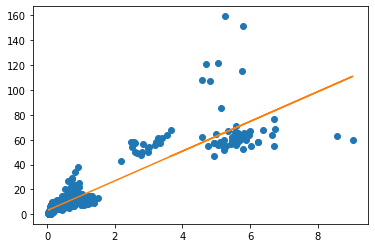

In [10]:
plt.plot(data['volume'], data['bags'], 'o')
plt.plot(data['volume'], (m*data['volume']+b))

# Simple linear regression whit Sklearn

In [11]:
from sklearn.linear_model import LinearRegression 
regressor = LinearRegression() 
model = regressor.fit(np.array(data['volume']).reshape(-1, 1), data['bags']) 

In [12]:
model.intercept_

2.9920963124699256

In [13]:
model.coef_

array([11.95321128])

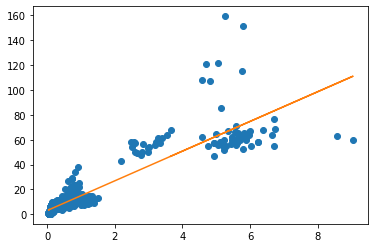

In [14]:
plt.plot(data['volume'], data['bags'], 'o')
plt.plot(data['volume'], (model.coef_[0]*data['volume']+model.intercept_))

# Packing a model

In [15]:
import pickle
 
# pickle regression object
 
numbers_list = model
list_pickle_path = 'regrssion_pickle.pkl'
 
# Create an variable to pickle and open it in write mode
list_pickle = open(list_pickle_path, 'wb')
pickle.dump(numbers_list, list_pickle)
list_pickle.close()

# Un-packing a model

In [16]:
# unpickling the list object
 
# Need to open the pickled list object into read mode
 
list_pickle_path = 'regrssion_pickle.pkl'
list_unpickle = open(list_pickle_path, 'rb')
 
# load the unpickle object into a variable
model2 = pickle.load(list_unpickle)
 
model2.coef_

array([11.95321128])

# Multi linear regression

In [17]:
data = pd.DataFrame({'bags':file['Total Bags']/10000, 'volume':file['Total Volume']/1000000, 'price':file['AveragePrice']})
data

,bags,volume,price
0,0.869687,0.064237,1.33
1,0.950556,0.054877,1.35
2,0.814535,0.118220,0.93
3,0.581116,0.078992,1.08
4,0.618395,0.051040,1.28
5,0.668391,0.055980,1.26
6,0.831886,0.083454,0.99
7,0.682922,0.109428,0.98
8,1.138836,0.099811,1.02
9,0.862592,0.074339,1.07


In [18]:
from sklearn.linear_model import LinearRegression 
regressor = LinearRegression() 
regressor.fit(np.array([data['volume'], data['bags']]).reshape(-1, 2), data['price'])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [19]:
regressor.coef_

array([-0.00098439, -0.00173599])

In [20]:
regressor.intercept_

1.1017131409446252

In [34]:
def multi_error(points, m, b):
    xs = np.array(points['volume'])
    zs = np.array(points['bags'])
    ys = np.array(points['price'])
    w1, w2 = 0, 0
    error = 0
    for i, x in enumerate(xs):
        error += (ys[i] - np.dot([xs[i], zs[i]], m)+b) ** 2
    return error/len(ys)

In [35]:
multi_error(data, [0, 0], 0)

1.1976801249999967

In [36]:
multi_error(data, [-0.00098439, -0.00173599], 1.1017131409446252)

4.898421820984769

In [ ]:
xs = np.array(data['volume'])
zs = np.array(data['bags'])
ys = np.array(data['prices'])
w1, w2 = 0, 0
m = [w1, w2]
for i, x in enumerate(xs):
    print(np.dot(xs[i], zs[i]))
    